# Getting QB data from sportsreference

This reads in the data from the page and puts into the data_df dataframe. I set the the max_columns to 50 so that I can see all of the data I have access to.

In [151]:
import pandas as pd
url = 'https://www.pro-football-reference.com/years/2022/passing.htm'
passing_data_df = pd.read_html(url)
passing_data_df = passing_data_df[0]
pd.set_option('display.max_columns', 50)
passing_data_df.head()

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD
0,1,Patrick Mahomes*+,KAN,27,QB,17,17,14-3-0,435,648,67.1,5250,41,6.3,12,1.9,272,67,8.1,8.5,12.1,308.8,105.2,77.6,26,188,3.9,7.51,7.93,4,4
1,2,Justin Herbert,LAC,24,QB,17,17,10-7-0,477,699,68.2,4739,25,3.6,10,1.4,228,55,6.8,6.9,9.9,278.8,93.2,58.3,38,206,5.2,6.15,6.22,4,5
2,3,Tom Brady,TAM,45,QB,17,17,8-9-0,490,733,66.8,4694,25,3.4,9,1.2,237,63,6.4,6.5,9.6,276.1,90.7,52.5,22,160,2.9,6.01,6.13,4,5
3,4,Kirk Cousins*,MIN,34,QB,17,17,13-4-0,424,643,65.9,4547,29,4.5,14,2.2,230,66,7.1,7.0,10.7,267.5,92.5,49.9,46,329,6.7,6.12,6.05,8,8
4,5,Joe Burrow*,CIN,26,QB,16,16,12-4-0,414,606,68.3,4475,35,5.8,12,2.0,222,60,7.4,7.6,10.8,279.7,100.8,58.7,41,259,6.3,6.52,6.76,3,4


Lets grab all of the relevants passing stats for each QB.

In [306]:
import re

# Remove +'s and *'s
passing_data_df['Player'] = passing_data_df['Player'].str.replace('+', '').str.replace('*', '')

qb_passing_stats = passing_data_df[passing_data_df['Pos'] == 'QB'][['Player', 'TD', 'Int', 'Yds']]

qb_passing_stats.head()

C:\Users\isaia\AppData\Local\Temp\ipykernel_4280\1091120444.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  passing_data_df['Player'] = passing_data_df['Player'].str.replace('+', '').str.replace('*', '')


,Player,TD,Int,Yds
0,Patrick Mahomes,41,12,5250
1,Justin Herbert,25,10,4739
2,Tom Brady,25,9,4694
3,Kirk Cousins,29,14,4547
4,Joe Burrow,35,12,4475


Now we need the rushing stats. 

In [153]:
url = 'https://www.pro-football-reference.com/years/2022/rushing.htm'
rushing_data_df = pd.read_html(url, skiprows=[0], header=0)
rushing_data_df = rushing_data_df[0].set_index('Rk')
rushing_data_df.head()

,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
Rk,,,,,,,,,,,,,,
1,Derrick Henry *,TEN,28,RB,16,16,349,1538,13,65,56,4.4,96.1,6
2,Josh Jacobs*+,LVR,24,RB,17,17,340,1653,12,93,86,4.9,97.2,3
3,Nick Chubb*,CLE,27,RB,17,17,302,1525,12,69,41,5.0,89.7,1
4,Saquon Barkley*,NYG,25,RB,16,16,295,1312,10,62,68,4.4,82.0,1
5,Najee Harris,PIT,24,RB,17,17,272,1034,7,45,36,3.8,60.8,3


Okay so now these are the rushing stats, but we're only interested in the QB rushing stats.

In [154]:
# Remove +'s and *'s. ALso remove leading and trailing spaces.
rushing_data_df['Player'] = rushing_data_df['Player'].str.replace('+', '').str.replace('*', '').str.strip()

qb_rushing_stats = rushing_data_df[rushing_data_df['Pos'] == 'QB'][['Player', 'TD', 'Yds', 'Fmb']]

qb_rushing_stats.head()

C:\Users\isaia\AppData\Local\Temp\ipykernel_4280\3831059480.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rushing_data_df['Player'] = rushing_data_df['Player'].str.replace('+', '').str.replace('*', '').str.strip()


,Player,TD,Yds,Fmb
Rk,,,,
34,Jalen Hurts,13,760,9
35,Justin Fields,8,1143,16
40,Josh Allen,7,762,13
42,Daniel Jones,7,708,6
44,Lamar Jackson,3,764,5


Now I want to merge these two dataframes with the 'Player' column so that we have all of the stats for each QB.

In [169]:
# Rename columns so that we can merge them and still differentiate between pass and rush stats
qb_passing_stats = qb_passing_stats.rename(columns={'TD': 'PassTD', 'Yds': 'PassYds'})
qb_rushing_stats = qb_rushing_stats.rename(columns={'TD': 'RushTD', 'Yds': 'RushYds'})

# Merge data frames on the player name to combine all the stats
qb_stats = qb_passing_stats.merge(qb_rushing_stats, on='Player')
qb_stats

,Player,PassTD,Int,PassYds,RushTD,RushYds,Fmb
0,Patrick Mahomes,41,12,5250,4,358,5
1,Justin Herbert,25,10,4739,0,147,8
2,Tom Brady,25,9,4694,1,-1,5
3,Kirk Cousins,29,14,4547,2,97,7
4,Joe Burrow,35,12,4475,5,257,6
...,...,...,...,...,...,...,...
72,Tim Boyle,0,2,33,0,-2,0
73,Brandon Allen,0,0,22,0,-1,0
74,Josh Johnson,0,0,10,0,3,0
75,Case Keenum,0,0,8,0,0,0


Awesome, now I've got all of the fantasy relevant stats. Now I'm gonna use data from a csv I made elsewhere that has auction draft data for my fantasy league. I will calculate their total fantasy points and compare it to how much money was spent on them in the fantasy draft.

In [301]:
# x and y values that will be plotted
x_arr = []
y_arr = []

# Read the csv file into a DataFrame
auction_df = pd.read_csv("auctiondraftresults.csv")

# Loop through the rows in the auction_df DataFrame
for i, row in auction_df.iterrows():
    if row["Position"] == "QB":
        # Get the corresponding row in the qb_stats DataFrame
        qb_player_stats = qb_stats.loc[qb_stats["Player"] == row["PlayerName"]]

        # Add bid amount to x values 
        amt = row['Bid Amount']
        x_arr.append(amt)
        
        # Calculate total fantasy points
        points = 0
        points += int(str(qb_player_stats['PassTD'])[5:-28].strip()) * 4
        points += int(str(qb_player_stats['RushTD'])[5:-28].strip()) * 6
        points += int(str(qb_player_stats['PassYds'])[5:-29].strip()) * .04
        points += int(str(qb_player_stats['RushYds'])[5:-29].strip()) * .1
        points += int(str(qb_player_stats['Int'])[5:-25].strip()) * -2
        points += int(str(qb_player_stats['Fmb'])[5:-25].strip()) * -2
        y_arr.append(int(points))

Now lets plot all of these points as well as a best fit line.

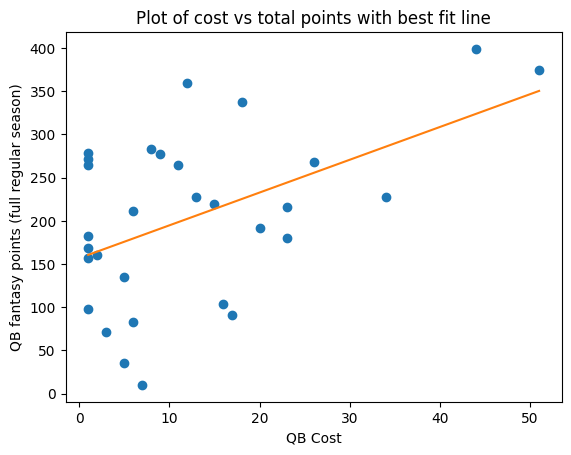

In [305]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the polynomial coefficients using numpy
coeffs = np.polyfit(x_arr, y_arr, 1)

# Generate the polynomial function using the coefficients
poly_func = np.poly1d(coeffs)

# Generate x values for the best fit line
x_best_fit = np.linspace(min(x_arr), max(x_arr), 100)

# Calculate the y values for the best fit line
y_best_fit = poly_func(x_best_fit)

# Plot the data points and best fit line
plt.plot(x_arr, y_arr, 'o', x_best_fit, y_best_fit)
plt.xlabel('QB Cost')
plt.ylabel('QB fantasy points (full regular season)')
plt.title('Plot of cost vs total points with best fit line')
plt.show()
